## **Cardio-Good-Fitness (Descriptive-Analysis)**
We are going to analyse a data set of Cardio-good-fitness for Treadmills.
In this data set there are datas of 3 treadmill models namely-
#### TM195, TM498 & TM798


-Importing of all the necessary libraries of python that will be required for this analysis


In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

-Importing the data set using the RAW file link from github

In [23]:
mydata=pd.read_csv("https://raw.githubusercontent.com/AMAN1011011/Kaggle-case-Studies/main/Cardio%20fitness%20(Treadmill%20Data%20Analysis)-api/DATA.api/CardioGoodFitness-1.csv")

In [24]:
#Shape of our data
mydata.shape
#our data have 180 rows and 9 columns

(180, 9)

In [25]:
#Output will show sample of our data, i.e. 10 random columns from the entire data set 
mydata.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
122,TM498,33,Male,16,Partnered,3,3,51165,95
18,TM195,23,Female,16,Single,4,3,38658,113
123,TM498,33,Female,16,Partnered,5,3,53439,95
84,TM498,21,Female,14,Partnered,5,4,34110,212
24,TM195,24,Male,14,Single,2,3,45480,113
140,TM798,22,Male,14,Single,4,3,48658,106
143,TM798,23,Male,16,Single,4,5,58516,140
164,TM798,28,Male,18,Single,6,5,88396,150
52,TM195,29,Female,16,Partnered,4,3,50028,94
162,TM798,28,Female,18,Partnered,6,5,92131,180


- In the above output we can see thata there are vatious columns like "Product" which have the model number os the treadmills that we are having, "Age" is the age of the customer using the particular model of the treadmill, "Gender" have the gender of the customer, "Education" have the literacy level or the education level of the customer on a scale of 12-21, "MaritalStatus" tells weather the person is single/Partnered, "Usage" is the amount of the time spend by the customer on a scale of 2-7, "Fitness" is the fitness level in a scale of 1-5, "Income" have the earnings of the customer and "Miles" is the miles run by the customer in a year.

In [26]:
#In the output we can see the data types available in the entire data set.
mydata.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

*  We can see that Product, Gender & MartialStatus have the data type as Object, and rest other is of int64 data type



In [27]:
#Description of data in data frame
mydata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


*  In the above description of the data we can see that the mean of Age, Usage, Fitness, Income and Miles are between 50% to 75% of the data

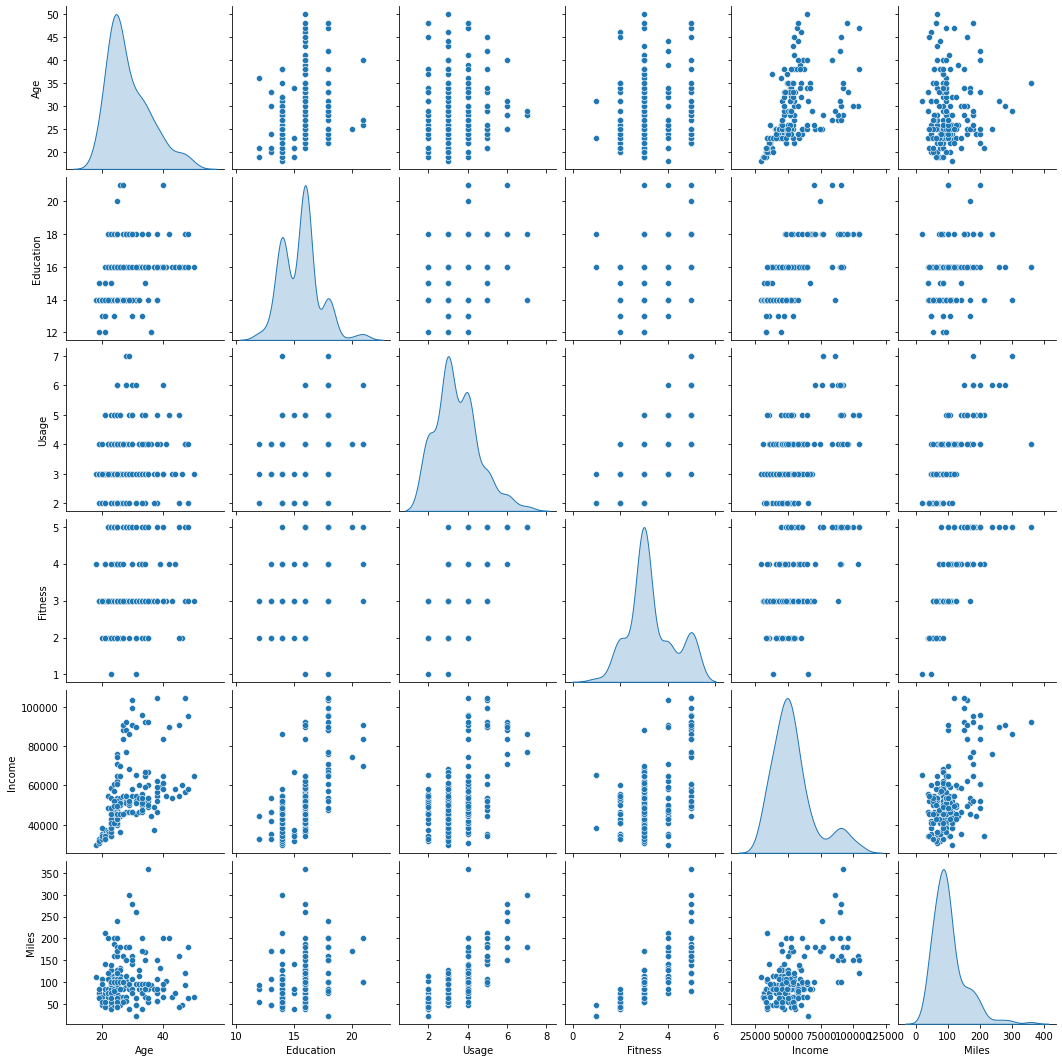

In [28]:
# Creating a pairplot of the entire data
sns.pairplot(mydata, diag_kind="kde");

In [29]:
# Finding corr elation in the data set
correlation = mydata.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


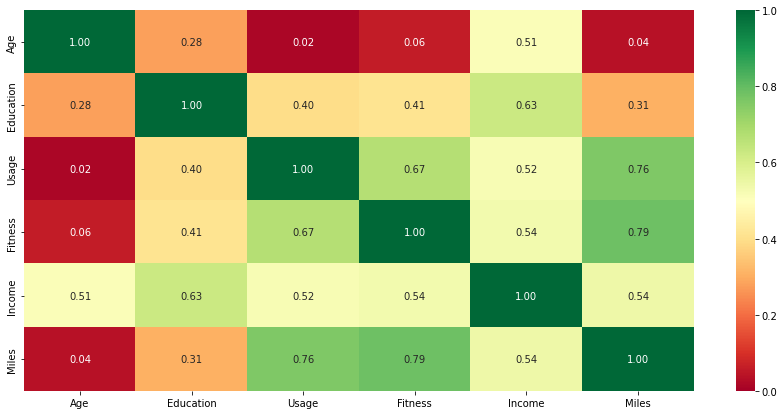

In [30]:
# Creating a heat map for the correlation
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=0, vmax=1, fmt=".2f", cmap="RdYlGn");

*  Usage, Fitness and Miles show higher correlation as the variables are related.
*  Education have a strong correlation with income.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


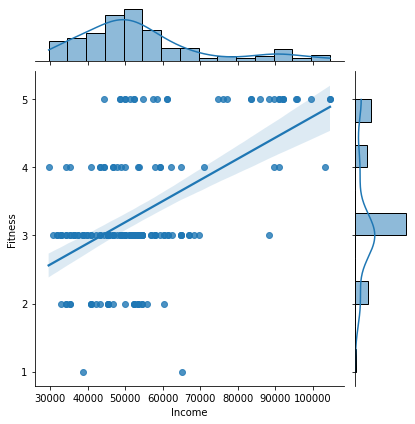

In [31]:
# Create a regplot of Fitness v/s Income
sns.jointplot(mydata['Income'],mydata['Fitness'], kind='reg');

*  It can be observed that peoples with income of nearly 30k to 60k are having a Fitness rate of 3

## Analyzing Categorical values
#### We are now going to make some analysis and find relation between Product, Gender & Marital Status 

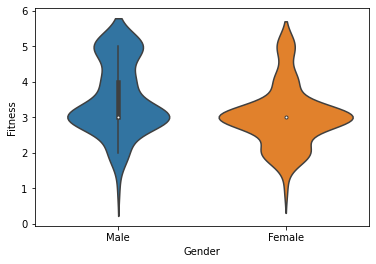

In [32]:
# Create a vilonplot of Fitness level gender.
sns.violinplot(x='Gender', y='Fitness', data=mydata);

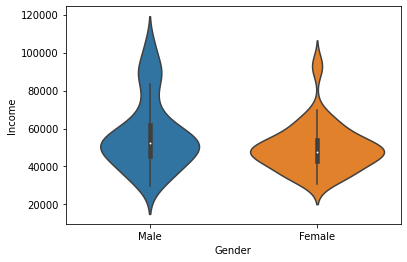

In [33]:
# Income Distribution over gender
sns.violinplot(x='Gender', y='Income', data=mydata);

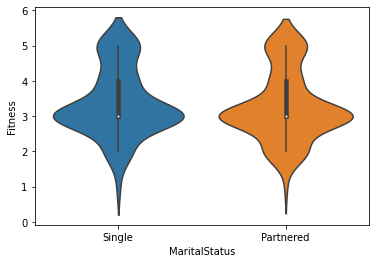

In [34]:
# Fitness distribution over MaritalStatus
sns.violinplot(x='MaritalStatus', y='Fitness', data=mydata);

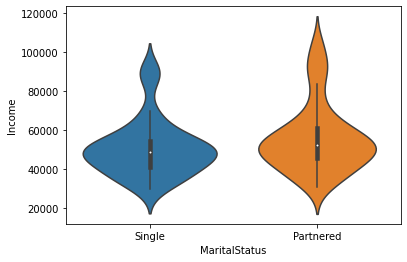

In [35]:
# Income over MaritialStatus
sns.violinplot(x='MaritalStatus', y='Income', data=mydata);

*  From the above analysis it can be observed that Feamles Fitness is bit downwards compared to males, and their income shows more narrow range than that of man
*  Man shows greater income distribution
*  Partenered peoples shows more income distribution compared to single

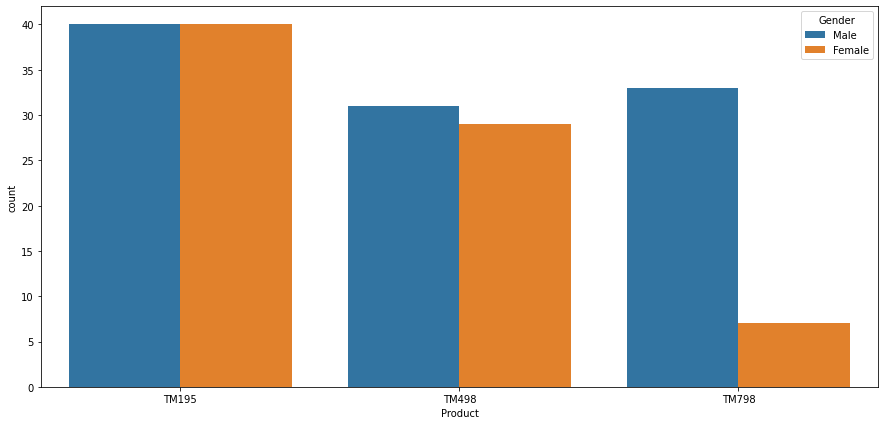

In [36]:
#Shows value counts for each distinct product no. and gender
plt.figure(figsize=(15, 7))
sns.countplot(x='Product', data=mydata, hue='Gender');

*  TM195 is the most famous and used product
*  TM498 is used least compared to TM198
*  TM798 is the least used probuct by Females, It has been found that Males are the highest users of this product

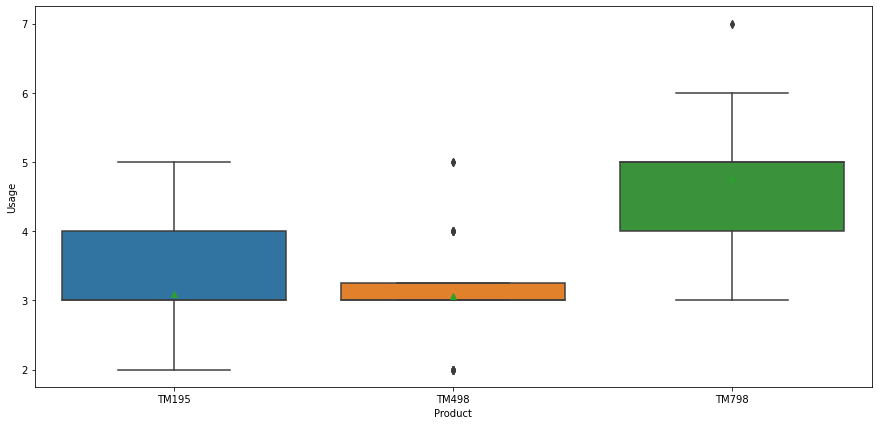

In [37]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Product',y='Usage', data=mydata, showmeans=True);

*  It can be observed that TM195 is being used 3-4 times a week
*  TM498 is the least used product
*  TM798 is being used the most and ranges a use of 4-5 times a week

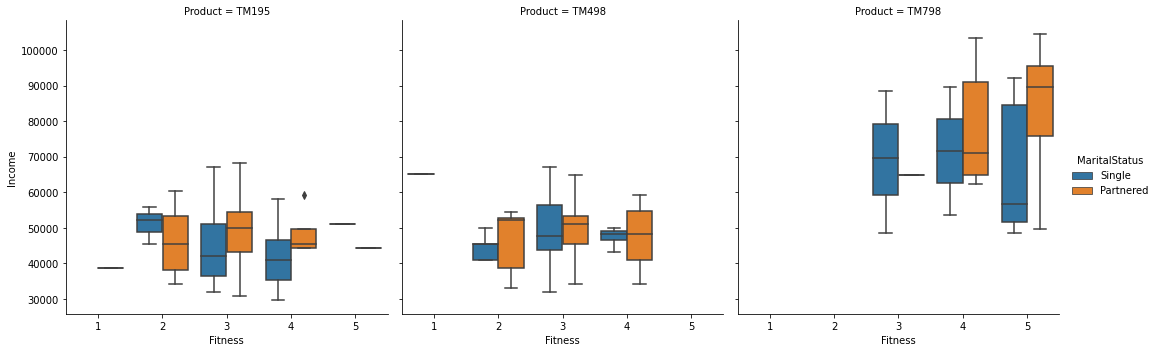

In [38]:
sns.catplot(x='Fitness',
            y='Income',
            hue="MaritalStatus",
            col="Product",
            data=mydata,
            kind="box");

*  TM195 is being used the most the income level of peoples using this product ranges between 40k-55k.
*  TM498 is being used lesser than TM198, However bith the products shows similarity in terms of income where theincome of peoples using both the products ranges between 40k-55k
*  TM798 is the least used product, it might be possible that the product is expensive as the costumers of TM798 shows an income distribution of 60k-100k 


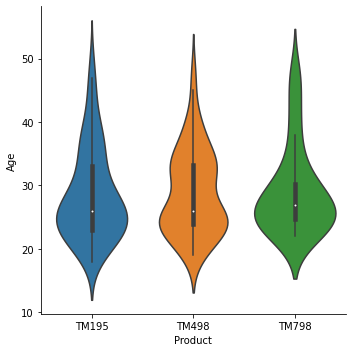

In [39]:
sns.catplot(x="Product", y="Age", data=mydata, kind="violin");

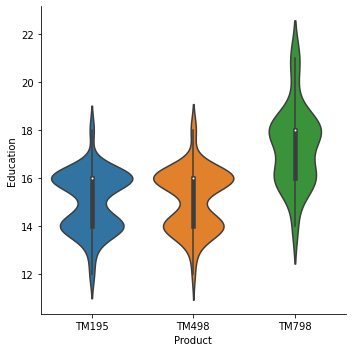

In [40]:
sns.catplot(x="Product", y="Education", data=mydata, kind="violin");

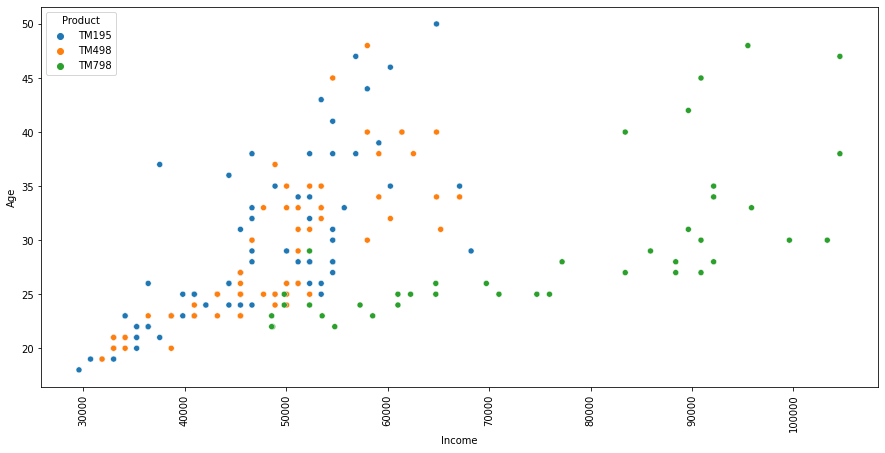

In [41]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Income", y="Age", data=mydata, ci=None, hue='Product')
plt.xticks(rotation=90);

*  Older  peoples are found to be showing more intrest in TM498 as it have denser distribution stretching upwards towards 40 year olds and above.
*  The users of product TM798 are found to be highly educated.

## OBSERVTION-OUTCOMES :


*  TM195 is found to be most popular and mass used productand have the highest number of costumers, Peoples using this product are moderately educated.

  Reccomendations:
  When targeting new customers for this product, a suggestion may be to     emphasize it's inclusivity towards runners of all levels and all ages
  Maintainin broad appeal is key


*  TM498 sits in the middle of the three products, with not as many overall customers, but appealing to the some of the same types of consumers as those who buy TM195 and the costumers of this product are prety old

  Reccomendations:

  When targeting new customers for this product, emphasize it's ease-of-use, friendliness, and due to a slighly older customer profile, safety features to prevent falls or other injuries.
Additionally, catering to a more low-mid income customer profile means that the price itself can be a seling point itself (vs. a high-end item geared towards customers who are less price-sensitive) 

*  TM798 customers are educated (most likely have post-grad degrees),fit and relatively young, more often men than women, and also have an income range that stretches higher (50k-100k)

  Reccomendations:

  When targeting new customers for this product, huge selling points would be the durability of the machine for high milage use, as well as any feature that affirms the customer's fitness lifestyle (i.e. advanced technology that can help track biometrics, features that help prevent athlete injuries)
Due to the customer profile of this product, there may be success in marketing the product as a high-end, luxury item geared more towards men's aesthetics